## *Prologue*

* **Python for Portfolio Optimization: The Ascent!**

First working lessons to ascend the hilly terrain of Portfolio Optimization in seven strides (Lessons), beginning with the fundamentals (Lesson 1) and climbing slope after slope (Lessons 2-6), to reach the first peak of constrained portfolio optimization models (Lesson 7), amongst a range of peaks waiting beyond!

* **Lesson 1 Fundamentals of Risk and Return of a Portfolio**    

* **Lesson 2 Some Glimpses of Financial Data Wrangling**   

* **Lesson 3 Heuristic Portfolio Selection**  

* **Lesson 4 Traditional Methods for Portfolio Construction**  

* **Lesson 5 Mean-Variance Optimization of Portfolios**

##  Lesson 6


# Sharpe Ratio based Portfolio Optimization 

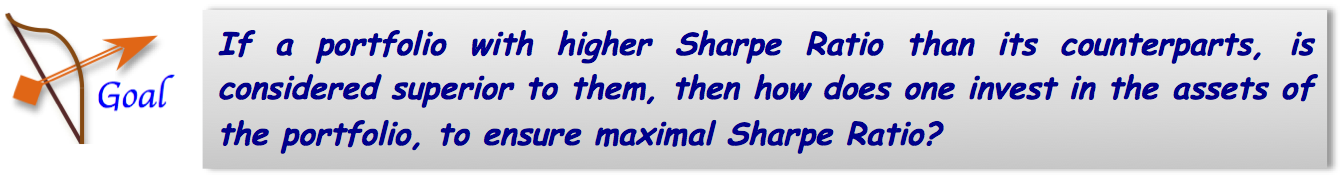

In [1]:
from IPython.display import Image
Image("/kaggle/input/sharpe-ratio-based-portfolio-optimization/Lesson6GoalHeaderImage.png")

## 6.1  Introduction

**Sharpe Ratio**, developed by Nobel Laureate William F Sharpe [SHA 66], is a measure of calculating risk adjusted return. It serves to help investors know about the returns on their investments relative to the risks they hold. The Sharpe Ratio is defined as

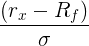

In [2]:
from IPython.display import Image
Image("/kaggle/input/sharpe-ratio-based-portfolio-optimization/Lesson6Eqn6_1.png")

<h5 align="right">..............................(6.1)</h5>

where $r_x$ is the average rate of return on the investment $x$, $R_f$,  the best available **risk free rate of return** and $\sigma$ the standard deviation of $r_x$, which denotes the risk on the investment. 

Higher the Sharpe Ratio, more is the excess returns over that of holding a risk free investment, relative to the increased volatility that the investment is exposed to. A Sharpe Ratio of 0, needless to say,  only denotes the investment to be risk-free or one that does not yield any excess return. In practice, while a Sharpe ratio of 1 marks the investment to be acceptable or good for investors, a value less than 1 grades the investment as  sub-optimal,  and values greater than 1 and moving towards 2 or 3, grades the investment as  highly superior. 

## 6.2 Maximizing Sharpe Ratio

Having understood the significance of the Sharpe Ratio, let us suppose an investor wishes to make an investment in  assets in such a way that the Sharpe Ratio of the portfolio would be the best possible or the maximum, that can be ensured for the investment.  


Let P be a portfolio comprising assets $A_1, A_2, ...A_N$, with $\mu_1, \mu_2, ...\mu_N$ as the asset returns and $W_1, W_2, ...W_N$ as the weights. 
 

The portfolio return $r$ determined by a weighted summation of its individual asset returns is given by, $\sum\left({W_i.\mu_i}\right)$ and the risk is given by $\sqrt{\sum\sum {W_i.W_j.\sigma_{ij}} } $. (See **Lesson 1 Fundamentals of Risk and Return of a Portfolio** to know about risk and return of a portfolio).  

To keep the discussion simple for now, let us suppose that  the investor decides to enforce only **basic constraints** on the portfolio. (See Sec. 5.2 of **Lesson 5 Mean Variance Optimization of Portfolios** to know about basic constraints).  
  
The mathematical model for the Sharpe Ratio based Portfolio Optimization is given by, 

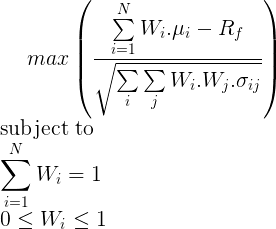

In [3]:
from IPython.display import Image
Image("/kaggle/input/sharpe-ratio-based-portfolio-optimization/Lesson6Eqn6_2.png")


<h5 align="right">..................................(6.2)</h5>

The numerator of the objective function denotes the excess returns of the investment over that of a risk free asset $R_f$ and the denominator the risk of the investment. The objective is to maximize the Sharpe Ratio. The basic constraints indicate that the investor wishes to have a fully invested portfolio. 

## 6.3 Solving the Sharpe Ratio Optimization Model

To solve the Sharpe Ratio maximization model represented by (6.2), we make use of the **minimize** library function from **scipy.optimize** package of Python. However, since the original objective function insists on maximization as opposed to minimization demanded by the **minimize** solver, the **principal of  duality** borrowed from Optimization Theory is employed to undertake the transformation. According to the principle,  


In [4]:
from IPython.display import Image
Image("/kaggle/input/sharpe-ratio-based-portfolio-optimization/Lesson6Eqn6_3.png")

<h5 align="right">..............................(6.3)</h5>

The Python code for the function **MaximizeSharpeRatioOptimization** which defines the objective function  and the basic constraints represented by (6.2),  is shown below: 

In [5]:
#function to undertake Sharpe Ratio maximization subject to 
#basic constraints of the portfolio

#dependencies
import numpy as np
from scipy import optimize 

def MaximizeSharpeRatioOptmzn(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        funcDenomr = np.sqrt(np.matmul(np.matmul(x, CovarReturns), x.T) )
        funcNumer = np.matmul(np.array(MeanReturns),x.T)-RiskFreeRate
        func = -(funcNumer / funcDenomr)
        return func

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit=np.repeat(0.33, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])
    
    #invoke minimize solver
    opt = optimize.minimize (f, x0 = xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'SLSQP',  \
                             bounds = bnds, constraints = cons, tol = 10**-3)
    
    return opt
    

The Sharpe Ratio optimization requires the computation of risk and return of the portfolio. The asset returns computing function **StockReturnsComputing**, is reproduced here for the reader's convenience. 

In [6]:
# function computes asset returns 
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

## 6.4  Case Study

 Let us suppose that an investor decides to invest in a $k$-portfolio ($k$-portfolio 1) comprising the  following  Dow stocks. ($k$ portfolio 1, is  detailed and listed in **Lesson 3 Heuristic Portfolio Selection**)  

**𝑘-portfolio 1**:  

{Coca-Cola (KO), United Health (UNH), Walt Disney (DIS), IBM (IBM), Cisco (CSCO), JPMorgan Chase (JPM), Goldman Sachs (GS), Walgreens Boots Alliance (WBA), Apple (AAPL), Home Depot (HD), American Express (AXP), McDonald's (MCD), Merck (MRK), Boeing (BA), Caterpillar (CAT)}       

The investor desires to explore the optimal portfolio set that would yield the maximal Sharpe Ratio.  The objective is to find out  the optimal weights that will ensure maximal Sharpe Ratio for the portfolio.

The following Python code reads the dataset concerned, computes the stock returns using the Python function **StockReturnsComputing** and obtains the mean returns and the variance-covariance matrix of returns. 


In [7]:
#obtain mean and variance-covariance matrix of returns for k-portfolio 1

#Dependencies
import numpy as np
import pandas as pd



#input k portfolio 1 dataset comprising 15 stocks
StockFileName = '/kaggle/input/sharpe-ratio-based-portfolio-optimization/DJIA_Apr112014_Apr112019_kpf1.csv'
Rows = 1259  #excluding header
Columns = 15  #excluding date

#read stock prices 
df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = df.iloc[0:, 1:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)


Asset labels of k-portfolio 1: 
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']

Mean Returns:
 [ 0.09   0.029  0.1    0.039  0.081  0.04   0.033  0.085 -0.016  0.06
  0.019  0.057  0.036  0.095 -0.002]

Variance-Covariance Matrix of Returns:
 [[2.375 0.672 0.962 1.042 0.999 0.68  0.954 0.726 0.709 0.825 0.306 0.458
  0.534 0.774 0.697]
 [0.672 1.648 0.8   0.95  0.7   0.569 1.065 0.658 0.663 1.001 0.307 0.35
  0.556 0.718 0.667]
 [0.962 0.8   2.288 1.31  0.89  0.716 1.066 0.747 0.777 0.977 0.381 0.472
  0.578 0.745 0.679]
 [1.042 0.95  1.31  2.733 1.041 0.688 1.321 0.796 0.885 1.169 0.358 0.455
  0.616 0.72  0.681]
 [0.999 0.7   0.89  1.041 1.789 0.713 0.927 0.724 0.817 0.909 0.362 0.477
  0.647 0.656 0.707]
 [0.68  0.569 0.716 0.688 0.713 1.35  0.773 0.586 0.574 0.717 0.302 0.368
  0.466 0.557 0.631]
 [0.954 1.065 1.066 1.321 0.927 0.773 2.114 0.795 0.803 1.554 0.303 0.467
  0.705 0.82  0.819]
 [0.726 0.658 0.747 0.796 0.724 0.5

The annual average risk free rate of return in USA during April 2019 was 3%. The daily risk free rate is computed  as   


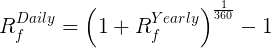

In [8]:
from IPython.display import Image
Image( "/kaggle/input/sharpe-ratio-based-portfolio-optimization/Lesson6Eqn6_4.png")



<h5 align="right">................................(6.4)</h5>

The following Python code computes the maximal Sharpe Ratio for  $k$-portfolio 1.

In [9]:
#obtain maximal Sharpe Ratio for k-portfolio 1 of Dow stocks

#set portfolio size
portfolioSize = Columns

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.26]] 
Annualized Risk (%):   [[14.749]] 
Annualized Expected Portfolio Return(%):   [21.584]

Optimal weights (%):
 [[13.694]
 [ 0.   ]
 [17.744]
 [ 0.   ]
 [12.151]
 [ 0.   ]
 [ 0.   ]
 [19.058]
 [ 0.   ]
 [ 1.151]
 [ 0.   ]
 [13.654]
 [ 0.   ]
 [22.547]
 [ 0.   ]]


The output shows that the maximal Sharpe Ratio attainable for $k$-portfolio 1 is 1.26 which is good,  going by practical standards. The annual expected portfolio return is 21.584% against an annualized risk of 14.749%. To achieve this, the optimal capital allocations on the assets of $k$-portfolio 1 are as follows:  

['AAPL': 13. 694%] , ['BA': 17.744%], ['CSCO': 12.151%],  ['HD': 19.058%], ['JPM': 1.151%],  ['MCD': 13.654%], ['UNH': 22.547%].  
  
No investments need  be made in the rest of the assets of $k$-portfolio 1 since the optimal weights arrived at for these assets are 0.  
However, if the investor desires to invest in all the assets in the $k$-portfolio 1, with the weights distributed across all the assets in the portfolio, all that the investor needs to do is to  redefine the bounds constraint of (6.2) as, $0\lt W_i\lt 1$ and run the **scipy**  solver over the optimization model.

Despite the wide use of Sharpe Ratios to compute risk adjusted returns, it is not without its disadvantages. Thus, if the expected returns do not follow a normal distribution or if the portfolios possess non-linear risks, to list a few of the instances, Sharpe Ratios may not deliver  results. Therefore, alternative methodologies such as **Sortino Ratio** and **Treynor Ratio** have emerged as  contenders to Sharpe Ratios. 

### Companion Reading  

This blog  is an abridged adaptation of concepts discussed in Chapter 1 and Chapter 3 of [PAI 18] to Dow Jones dataset (DJIA index: April, 2014- April, 2019) and implemented in Python. Readers (read "worker bees"),  seeking more information may refer to the corresponding chapters in the  book.

<h3 align="left">References</h3>   
 
[SHA 66]  Sharpe, William F. Mutual Fund Performance,  *Journal of Business*, January 1966, pp. 119-138.   

[PAI 18]   Vijayalakshmi Pai G. A., Metaheuristics for Portfolio Optimization- An Introduction using MATLAB, Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html    
 
 **GitHub Repository**    

PythonFinance-PortfolioOptimization https://github.com/PaiViji


## Next...

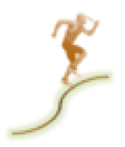

In [10]:
from IPython.display import Image
Image("/kaggle/input/sharpe-ratio-based-portfolio-optimization/Lesson6ExitTailImage.png")

**Lesson 7: Constrained Portfolio Optimization**  

(Goal: How can an investor know how much to invest in a portfolio of the investor's choice, which besides the objectives of maximizing return and minimizing risk, is constrained by the investor's preference for certain asset classes or assets, or imposition of capital budgets over selective assets in the portfolio?)   

Kaggle Kernel: Constrained Portfolio Optimization